In [173]:
 #  A Whale off the Port(folio)

# In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [174]:
# Initial imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


In [175]:
# Set the files paths

whalepath = Path("whale_returns.csv")
algopath = Path("algo_returns.csv")
sptxpath = Path("sp_tsx_history.csv")


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [176]:
# Reading whale returns

whaledf = pd.read_csv(whalepath, index_col = "Date", parse_dates = True, infer_datetime_format = True)
whaledf.sort_index(inplace = True)
whaledf.head(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [177]:
# Count nulls

whaledf.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [178]:
# Drop nulls

whaledf.dropna(inplace=True)
whaledf.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [179]:
# Reading algorithmic returns

algodf = pd.read_csv(algopath, index_col = "Date", parse_dates = True, infer_datetime_format = True)
algodf.sort_index(inplace = True)
algodf.head(10)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [180]:
# Count nulls

algodf.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [181]:
# Drop nulls

algodf.dropna(inplace=True)
algodf.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [182]:
# Reading S&P TSX 60 Closing Prices

sptxdf = pd.read_csv(sptxpath, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sptxdf.sort_index(inplace = True)
sptxdf.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [183]:
# Check Data Types

sptxdf.dtypes

Close    object
dtype: object

In [184]:
# Fix Data Types

# Removing '$' and ',' signs from the data and changing object type to float
sptxdf["Close"] = sptxdf["Close"].str.replace("$", "")
sptxdf["Close"] = sptxdf["Close"].str.replace(",", "")
sptxdf["Close"] = sptxdf["Close"].astype("float")


In [185]:
sptxdf.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [186]:
sptxdf.dtypes

Close    float64
dtype: object

In [187]:
# Calculate Daily Returns for sptx

#SP TX daily returns

sp_returns = sptxdf.pct_change()


In [188]:
sp_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [189]:
# Drop nulls

sp_returns.dropna(inplace=True)


In [190]:
# Rename `Close` Column to be specific to this portfolio.

sp_returns = sp_returns.rename(columns = {'Close':'SP_tsx'})

sp_returns.head()

,SP_tsx
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [191]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

joined_data_cols = pd.concat([whaledf, algodf, sp_returns], axis ="columns", join ="inner")
joined_data_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'daily returns of all portfolios'}, xlabel='Date'>

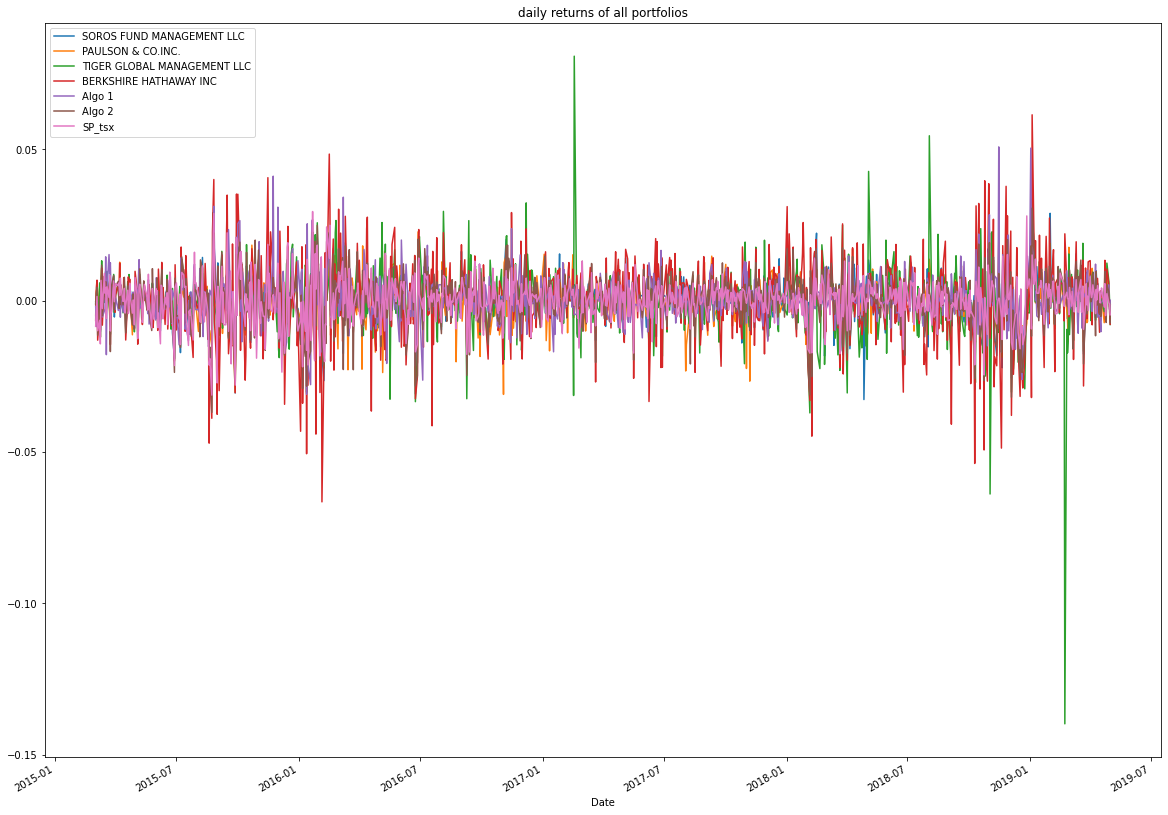

In [192]:
## Plot daily returns of all portfolios
joined_data_cols.plot(title="daily returns of all portfolios",figsize=(20,15))


In [193]:
#### Calculate and Plot cumulative returns.

cumulative_returns = (1+joined_data_cols).cumprod()
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071
2019-04-30,1.127228,0.762119,0.855749,1.365054,2.021675,1.204187,1.070803
2019-05-01,1.120637,0.761096,0.848958,1.354361,2.021865,1.195327,1.065767


<AxesSubplot:xlabel='Date'>

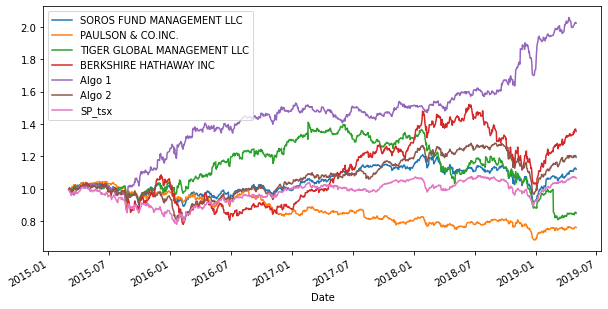

In [194]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

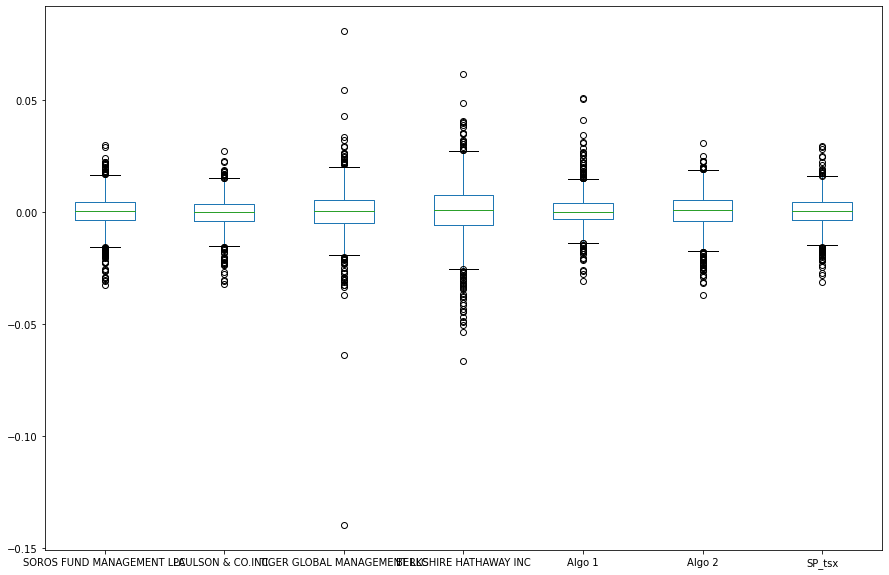

In [195]:
# Box plot to visually show risk

joined_data_cols.plot(kind='box',figsize=(15,10))


### Calculate Standard Deviations

In [196]:
# Calculate the daily standard deviations of all portfolios

daily_std = joined_data_cols.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP_tsx                         0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [197]:
# Calculate  the daily standard deviation of S&P TSX 60

daily_sp_std = joined_data_cols["SP_tsx"].std()
daily_sp_std

# Determine which portfolios are riskier than the S&P TSX 60

daily_std>daily_sp_std


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP_tsx                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [198]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std.head()


SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

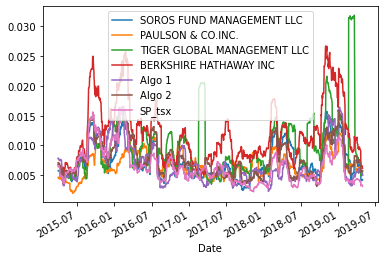

In [199]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

joined_portfolios_rollingstd = joined_data_cols.rolling(window=21).std()

# Plot the rolling standard deviation

joined_portfolios_rollingstd.plot()


### Calculate and plot the correlation

In [200]:
# Calculate the correlation

correlationdf = joined_data_cols.corr()

# Display de correlation matrix

correlationdf.style.background_gradient()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP_tsx,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

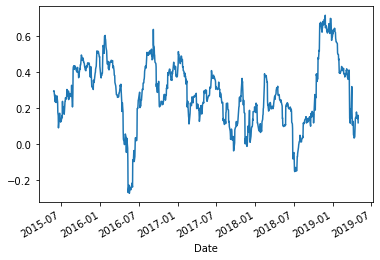

In [201]:
# Calculate covariance of a single portfolio

sp_covariance = joined_data_cols["Algo 1"].rolling(window=60).cov(joined_data_cols["SP_tsx"])


# Calculate variance of S&P TSX


SP_tsx_variance = joined_data_cols["SP_tsx"].rolling(window=60).var()


# Computing beta

beta = sp_covariance/SP_tsx_variance


# Plot beta trend

beta.plot()


<AxesSubplot:xlabel='Date', ylabel='Range'>

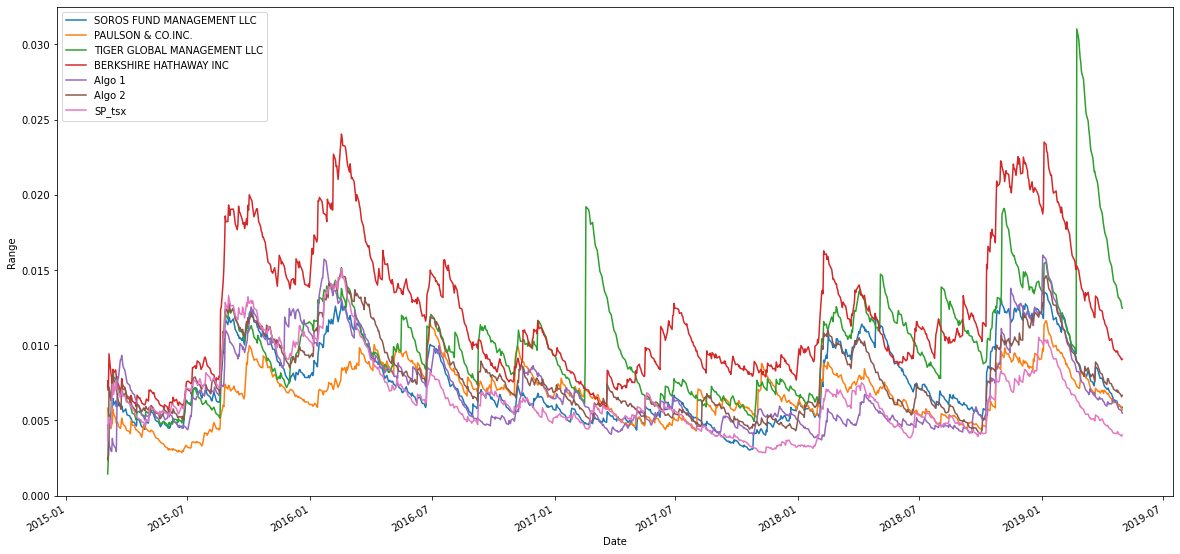

In [202]:
## Rolling Statistics Challenge: Exponentially Weighted Average 

# An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

joined_data_cols.ewm(21).std().plot(figsize=(20,10), xlabel = 'Date', ylabel = 'Range', legend = True)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [203]:
# Annualized Sharpe Ratios

sharpe_ratios = ((joined_data_cols.mean()-joined_data_cols['SP_tsx'].mean()) * 252) / (joined_data_cols.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.110980
PAULSON & CO.INC.             -0.744596
TIGER GLOBAL MANAGEMENT LLC   -0.270851
BERKSHIRE HATHAWAY INC         0.359795
Algo 1                         1.310258
Algo 2                         0.231615
SP_tsx                         0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

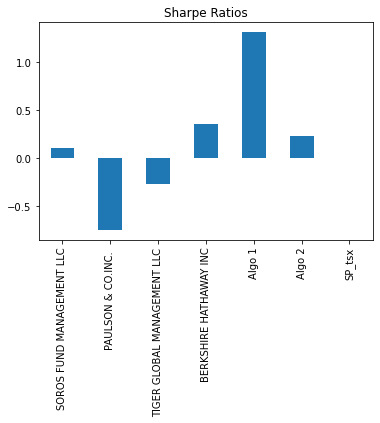

In [222]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

# Algo 1 outperforms all whales portfolios as well as S&P TSX 60 whereas Algo 2 outperforms S&P TSX 60 and all whales portfolios except Berkshire Hathaway. Overall, Algorithmic strategies are in a better position than Whales portfolios and S&P TSX 60.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [205]:
# Reading data from Shopify CSV

shop_path = Path("shop.csv")
shopdf = pd.read_csv(shop_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)
shopdf.head()  

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [206]:
# Reading data from Otex CSV

otex_path = Path("otex.csv")
otexdf = pd.read_csv(otex_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)
otexdf.head()



,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [207]:
# Reading data from Loblaw CSV

loblaw_path = Path("loblaw.csv")
loblawdf = pd.read_csv(loblaw_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)
loblawdf.head()


,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [208]:
# Combine all stocks in a single DataFrame

joined_stocks_data = pd.concat([shopdf, otexdf, loblawdf], axis ="rows", join ="inner")
joined_stocks_data = joined_stocks_data.sort_index()
joined_stocks_data.head()


,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-02,L,57.99
2018-01-02,OTEX,43.58
2018-01-03,SHOP,135.15
2018-01-03,L,57.41


In [209]:
# Reset Date index

joined_stocks_data.reset_index()

joined_stocks_data.head()


,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-02,L,57.99
2018-01-02,OTEX,43.58
2018-01-03,SHOP,135.15
2018-01-03,L,57.41


In [210]:
# Reorganize portfolio data by having a column per symbol

joined_stocks_data_new = joined_stocks_data.pivot_table(values="Close", index="Date", columns="Symbol")


joined_stocks_data_new.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [211]:
# Calculating daily returns for the joined stocks data

daily_returns = joined_stocks_data_new.pct_change()
daily_returns = daily_returns.dropna()
daily_returns.head()


Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [212]:
# Set weights

shop_weight = 0.33
otex_weight = 0.33
l_weight = 0.33

# Calculate portfolio return

portfolio_returns = shop_weight * daily_returns["SHOP"] + otex_weight * daily_returns["OTEX"]+ l_weight * daily_returns["L"]


# Display sample data

portfolio_returns.head()

Date
2018-01-03    0.000559
2018-01-04    0.004472
2018-01-05   -0.003095
2018-01-08   -0.000987
2018-01-09   -0.000989
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [213]:
# Join your returns DataFrame to the original returns DataFrame

joined_portfolios = pd.concat([joined_data_cols, portfolio_returns], axis="columns", join="inner" )

joined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000559
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004472
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003095
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000987
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000989


In [214]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

joined_portfolios.dropna().copy()
joined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000559
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004472
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003095
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000987
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000989


In [215]:
# Renaming columns to name "My Portfolio"

joined_portfolios.columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo1", "Algo2", "SP_tsx", "My Portfolio"]

joined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo1,Algo2,SP_tsx,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000559
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004472
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003095
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000987
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000989


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [216]:
# Calculate the annualized `std`

daily2_std = joined_portfolios.std()

annualized2_std = daily2_std * np.sqrt(252)

annualized2_std.head()

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC               0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo1                          0.120028
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard deviation for joined portfolios'}, xlabel='Date'>

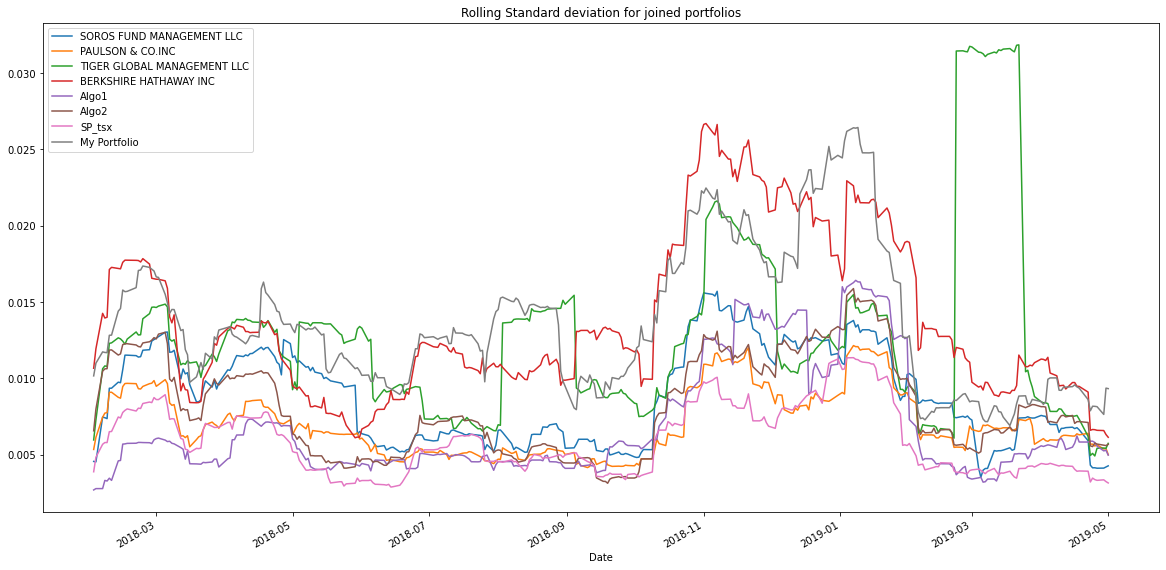

In [217]:
# Calculate rolling standard deviation

rolling_std = joined_portfolios.rolling(window=21).std()

# Plot rolling standard deviation

rolling_std.plot(figsize=(20,10),title = 'Rolling Standard deviation for joined portfolios')


### Calculate and plot the correlation

<AxesSubplot:>

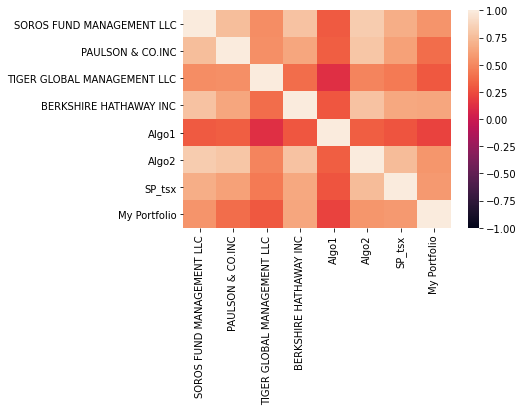

In [218]:
# Calculate and plot the correlation

correlation2 = joined_portfolios.corr()

import seaborn as sns

sns.heatmap(correlation2, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'My Portfolio'}, xlabel='Date'>

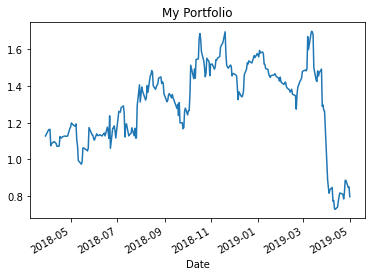

In [219]:
# Calculate and plot Beta

 #Calculate covariance of S&P TSX

covariance = joined_portfolios["My Portfolio"].rolling(window=60).cov(joined_portfolios['SP_tsx'])


 # Calculate variance of S&P TSX


variance = joined_portfolios["SP_tsx"].rolling(window=60).var()


 # Computing beta

beta = covariance/variance


# Plot beta trend

beta.plot(title='My Portfolio')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [220]:
# Calculate Annualzied Sharpe Ratios

sharpe_ratio = ((joined_portfolios.mean() * 252) / (joined_portfolios.std() * np.sqrt(252)))
sharpe_ratio.head()
                 

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC              -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo1                          1.901461
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

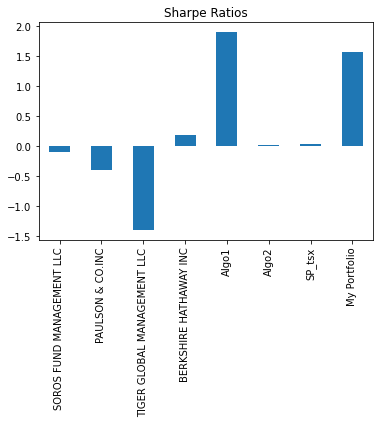

In [221]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot(kind = 'bar', title = 'Sharpe Ratios')

### How does your portfolio do?

Any Sharpe ratio greater than 1.0 is considered acceptable to good by investors. A ratio higher than 2.0 is rated as very good. A ratio of 3.0 or higher is considered excellent. My Portfolio is a little above 1.5 and is doing better than all portfolios, except Algo1.